# Problem Set 1, due April 13th at 3:30pm 
(in other words, it is due at noon, or one minute after 11:59am).

###Before You Start
Make sure to at least take a basic tutorial in the IPython notebook, otherwise you'll be totally lost.  For this problem set, you should download INFX574-PS1.ipynb and the flights.zip dataset from Canvas. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
ipython notebook <name_of_downloaded_file>
```

You should also make sure the following libraries load correctly (click on the box below and hit Ctrl-Enter)

In [1]:
#IPython is what you are using now to run the notebook
import IPython
print ("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print ("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print ("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print( "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print ("Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print ("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       4.2.0 (need at least 1.0)
Numpy version:        1.11.0 (need at least 1.7.1)
SciPy version:        0.17.0 (need at least 0.12.0)
Pandas version:       0.18.1 (need at least 0.11.0)
Mapltolib version:     1.5.1 (need at least 1.2.1)
Scikit-Learn version: 0.17.1 (need at least 0.13.1)


##About the Problem Set: 
This is the same problem set used by Emma Spiro in INFX573. The only difference is that instead of doing the problem set in R, you will use Python and the IPython notebook.

##Instructions: 
In this problem set you will perform a basic exploratory analysis on an example dataset, bringing to bear all of your new skills in data manipulation and visualization. You will be required to submit well commented python code, documenting all code used in this problem set, along with a write up answering all questions below. Use figures as appropriate to support your answers, and when required by the problem. 
This data set uses the NYCFlights13 dataset. You can download the dataset from canvas.

In [2]:
#import the required libraries for the problem set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#inline matplotlib
%matplotlib inline 

In [3]:
#load the datasets
flights_df= pd.read_csv('flights.csv')
weather_df = pd.read_csv('weather.csv')

In [4]:
#dimensions of the flights dataset. O/P: (rows,columns)
print (flights_df.shape)

#column names of flights
print (flights_df.columns)

#data types of each variable in the dataset
print (flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [5]:
#select all unique destinations 
flights_df.dest.unique()

#view initial 10 rows in the dataset
flights_df.head(10)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


##Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc
* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

##Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [6]:
#unique origin airports
flights_df.origin.unique()

#select the subset of the data where the destination is Seattle. Count such flights.
flights_df[(flights_df.dest == 'SEA')].dest.count()

3923

There are three originating airports in the dataset - EWR, LGA, JFK. Considering these three are in the NYC, I will calculate the number of flights flying from NYC to Seattle. 
There are 3923 flights that are listed as destination Seattle.

(b) How many airlines fly from NYC to Seattle?

In [7]:
#unique airlines in the dataset
(flights_df.carrier.unique()).size

#carriers flying to Seattle
(flights_df[(flights_df.dest == 'SEA')].carrier.unique()).size

5

There are overall 16 unique carriers listed in the dataset.
Of these 16 carriers only 5 carriers fly to Seattle from NYC.

(c) How many unique air planes fly from NYC to Seattle?

In [8]:
#Subset the dataset with destination as Seattle and then find unique Airplanes(using tailnums)
sum(~pd.isnull(flights_df[(flights_df.dest == 'SEA')].tailnum.unique()))


935

There are 935 unique airplanes flying from NYC to Seattle

(d) What is the average arrival delay for flights from NYC to Seattle?

In [9]:
#calculate the mean by subsetting the data with destination as Seattle
flights_df[(flights_df.dest == 'SEA')].arr_delay.mean()

-1.0990990990990992

The average arrival delay of the flights flying from NYC to Seattle is -1.099. This can be approximated to -1.10. A negative value means that on average the flights flying from NYC to Seattle arrive "early" by 1.10 mins

(e) What proportion of flights to Seattle come from each NYC airport?

In [10]:
#Make a crosstabulation of the flights coming from NYC to SEA
flights_toSEA = pd.crosstab(index=flights_df[(flights_df.dest == 'SEA')].origin, columns = "count")

#Calculate the proportion by dividing the sum
flights_toSEA / flights_toSEA.sum()

col_0,count
origin,
EWR,0.466735
JFK,0.533265


 No flights fly from LGA so that accounts to 0.0
 The proportion of flights flying from EWR to SEA is 0.467
 The proportion of flights flying from JFK to SEA is 0.533

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [11]:
#creating a groupby table which is indexed by Month and Day and not year because the data is for 2013 year
#the departure delay is then aggregated for every date
dep_delay_by_date = flights_df.groupby(['month','day'])['dep_delay'].mean()

#select the the date for largest average departure delay
dep_delay_by_date[(dep_delay_by_date == dep_delay_by_date.max())]

month  day
3      8      83.536921
Name: dep_delay, dtype: float64

In [12]:
#creating a groupby table which is indexed by Month and Day and not year because the data is for 2013 year
#the arrival delay is then aggregated for every date
arr_delay_by_date = flights_df.groupby(['month','day'])['arr_delay'].mean()

#select the the date for largest average arrival delay
arr_delay_by_date[(arr_delay_by_date == arr_delay_by_date.max())]

month  day
3      8      85.862155
Name: arr_delay, dtype: float64

 8th of March seems to have the worst average departure and average arrival delay.
 The worst avearge departure delay is 83.54 minutes.
 The worst avearge arrival delay is 85.86 minutes.

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [13]:
#groupby the number of flights only if there is departure delay (departure delay is greater than 0)
num_delayedflights = flights_df[flights_df.dep_delay>0.0].groupby(['month','day'])['dep_delay'].count()

#retrieve the date for the maximum number of delayed flights
num_delayedflights[(num_delayedflights== num_delayedflights.max())]

month  day
12     23     674
Name: dep_delay, dtype: int64

If we consider the number of flights that were delayed then 23rd December is the worst day to fly out because there were 674 flights that got delayed while departing.

(c) Are there any seasonal patterns in departure delays for flights from NYC?

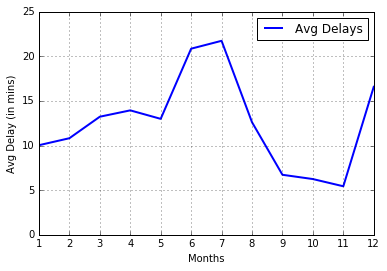

In [14]:
#plot the data by averaging the departure delay by months
plt.plot(flights_df.groupby(['month'])['dep_delay'].mean(), label = "Avg Delays",linewidth =2.0)

#set the x-axis label to months
plt.xlabel('Months')

#set the x-axis to not plot 0 month
plt.xlim(1,12)

#increase the number of visible ticks to individual months to show all months
plt.xticks(range(1,13))

#set the y-label to average delay 
plt.ylabel('Avg Delay (in mins)')

#set the limits of y-axis
plt.ylim(0,25)

#set the grid to true
plt.grid(True)

#plot legends
plt.legend()

There is no seasonal pattern as such in the departure delays. 
The departure delay keeps on steadily increasing from Winter(January to March) until April then it starts to decrease only to shoot up in Summer. We observe high departure delays in the starting months of summers June and July. From July onwards the average departure delay decreases and shoots up in December.

(d) On average, how do departure delays vary over the course of a day?

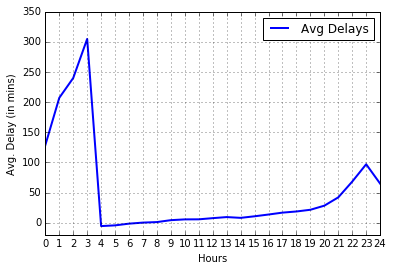

In [15]:
#plot the data by averaging the departure delay by months
plt.plot(flights_df.groupby(['hour'])['dep_delay'].mean(), label = "Avg Delays",linewidth =2.0)

#set the y-label to average delay 
plt.ylabel('Avg. Delay (in mins)')

#set the limits of y-axis
plt.ylim(-20,350)

#set the x-axis label to hours
plt.xlabel('Hours')

#set the x-axis to hours limit of 0-23 
plt.xlim(0,23)

#increase the number of visible ticks to individual hour to show all hours
plt.xticks(range(0,25))

#set the grid to true
plt.grid(True)

#plot legends
plt.legend()

Post-midnight the average departure delays keeps on increasing until 3 AM. After that we observe a very steep decline and the flights tend to depart early(-ve average departure delay) until 6 AM. There after, we observe steady increase in the departure delays

## Question 3
    Which flight departing NYC in 2013 flew the fastest?

In [16]:
#compute the speed variable. Divide the time by 60 because we are now 
#considering the speed which is measured in miles per hour
flights_df['speed'] = flights_df.distance / (flights_df.air_time/60)

#Find the row with the maximum flight speed
flights_df[(flights_df.speed == flights_df.speed.max())]

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,speed
216447,216448,2013,5,25,1709.0,9.0,1923.0,-14.0,DL,N666DN,1499,LGA,ATL,65.0,762,17.0,9.0,703.384615


 Flight number 1499 flying from LaGuardia to Atlanta on 25th May flew the fastest with a speed of 703.38 MPH.

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [17]:
#group by carrier, flight number and destination. Count the number of rows in each group
a = flights_df.groupby(['carrier','flight','dest']).count()

#sort the result in descending order of the count for each group of "carrier, flight and destination"
a = a.sort_values('Unnamed: 0', ascending = False)

#retrieve the ones only with the count as 365. This implies that for each day there was a flight from NYC to the destination.
#I am assuming that the a particular airline flying to a destination has a unique flight number which does not repeat in the 
#day
a = a[(a.year == 365)]

#view all such flights
print(a[[1]])

#Number of such flight combinations
print("There are %d (carrier, flight and destination) combinations. "%(a[[1]].shape[0]))

                     year
carrier flight dest      
AA      1611   MIA    365
B6      703    SJU    365
AA      1357   SJU    365
VX      413    LAX    365
B6      219    CLT    365
UA      15     HNL    365
B6      359    BUR    365
        371    FLL    365
        431    SRQ    365
AA      181    LAX    365
DL      2159   MCO    365
AA      119    LAX    365
VX      407    LAX    365
EV      5712   IAD    365
VX      251    LAS    365
AA      59     SFO    365
B6      1783   MCO    365
DL      2391   TPA    365
There are 18 (carrier, flight and destination) combinations. 


To answer this question I am assuming that an airline flies to a particular destination in the same day with a particular unique flight number. So even though an airline flies to a particular destination multiple times, it will have a different flight number. This makes the combination of carrier, flight and destination unique.
Keeping this in mind, I performed a group by carrier, flight and destination. The groups (carrier, flight and destination) with the occurence count as 365, implies they flew daily for every day of the year (365 days).

There are 18 such flight combinations (carrier, flight, destination) that fly daily.

American Airlines (AA) flew to destinations - Miami (MIA - 1611), San Juan (SJU - 1357), Los Angeles (LAX - 181, LAX - 119), San Fransico (SFO - 59)
JetBlue Airlines (B6) flew to destinations - San Juan (SJU - 703), Charlotte (CLT - 219), Burbank (BUR - 359), Fort Lauderdale (FLL 371), Sarasota–Bradenton (SRQ - 431), Orlando (MCO - 1783)
Virgin America (VX) flew to destinations - Los Angeles (LAX - 413, LAX - 407), Las Vegas (LAS - 251)
United America (UA) flew to destinations - Honululu (HON - 15)
Delta (DL) flew to destinations - Orlando (MCO -2159), Tampa (TPA - 2391)
Eva Air (EV) flew to destination - Dulles (IAD - 5712)

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


In [18]:
#view the correlation matrix to find any interesting 
flights_df.corr()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute,speed
Unnamed: 0,1.000000,NaN,0.071779,0.087852,0.002172,0.049713,-0.024680,0.018613,0.002676,-0.032866,0.012526,0.002236,-0.001849,0.194342
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.071779,NaN,1.000000,0.002942,-0.003932,-0.020057,-0.002520,-0.017382,-0.000834,0.010924,0.021636,-0.004118,0.005242,0.062572
day,0.087852,NaN,0.002942,1.000000,-0.000467,0.000420,-0.005537,-0.000319,-0.001791,0.002236,0.003041,-0.000426,-0.001086,0.009830
dep_time,0.002172,NaN,-0.003932,-0.000467,1.000000,0.260231,0.660779,0.232306,0.041957,-0.014619,-0.013998,0.999307,-0.045081,-0.029196
dep_delay,0.049713,NaN,-0.020057,0.000420,0.260231,1.000000,0.028729,0.914803,0.054734,-0.022405,-0.021671,0.261786,-0.058306,-0.007766
arr_time,-0.024680,NaN,-0.002520,-0.005537,0.660779,0.028729,1.000000,0.024482,0.025042,0.054296,0.046991,0.660232,-0.027331,0.001102
arr_delay,0.018613,NaN,-0.017382,-0.000319,0.232306,0.914803,0.024482,1.000000,0.072862,-0.035297,-0.061868,0.233851,-0.056303,-0.135189
flight,0.002676,NaN,-0.000834,-0.001791,0.041957,0.054734,0.025042,0.072862,1.000000,-0.472838,-0.484165,0.042334,-0.012782,-0.376182
air_time,-0.032866,NaN,0.010924,0.002236,-0.014619,-0.022405,0.054296,-0.035297,-0.472838,1.000000,0.990650,-0.013847,-0.019799,0.614475


 We see a correlation of 0.61 and 0.68 between speed and air_time and distance. But this is not to be confused as strong correlation because of colinearity. 
 There is a strong corelation between departure delay and arrival delay. Does that imply that the flights that are delayed do little to cover for the time they lose? 
 Let's explore!

In [20]:
#check for linear correlations
f_ddelay[['dep_delay','arr_delay','distance']].corr()
f_ddelay.corr() 

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute,speed
Unnamed: 0,1.000000,NaN,0.059602,0.072123,0.033175,0.063586,-0.015098,0.047380,-0.019970,-0.019249,0.028929,0.032779,0.011033,0.209198
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.059602,NaN,1.000000,0.002331,0.002798,-0.027857,0.004021,-0.025101,-0.013855,0.037986,0.043014,0.002667,0.003556,0.067342
day,0.072123,NaN,0.002331,1.000000,-0.004801,-0.006786,-0.010334,-0.006872,-0.003653,0.002956,0.003667,-0.004870,0.001786,0.010148
dep_time,0.033175,NaN,0.002798,-0.004801,1.000000,0.216923,0.415083,0.199759,0.039505,-0.033080,-0.030262,0.999303,0.032333,-0.026898
dep_delay,0.063586,NaN,-0.027857,-0.006786,0.216923,1.000000,-0.083270,0.938107,0.102788,-0.092739,-0.090594,0.215210,0.048810,-0.053668
arr_time,-0.015098,NaN,0.004021,-0.010334,0.415083,-0.083270,1.000000,-0.079125,0.041937,0.019580,0.011937,0.414631,0.017783,-0.025490
arr_delay,0.047380,NaN,-0.025101,-0.006872,0.199759,0.938107,-0.079125,1.000000,0.113029,-0.097236,-0.118975,0.198312,0.041468,-0.159814
flight,-0.019970,NaN,-0.013855,-0.003653,0.039505,0.102788,0.041937,0.113029,1.000000,-0.479881,-0.489188,0.038840,0.018353,-0.390587
air_time,-0.019249,NaN,0.037986,0.002956,-0.033080,-0.092739,0.019580,-0.097236,-0.479881,1.000000,0.990036,-0.033514,0.011172,0.606140


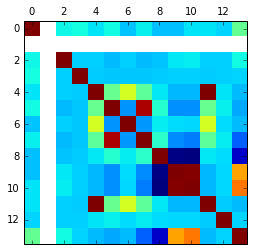

In [21]:
#correlation matrix plot
plt.matshow(f_ddelay.corr())

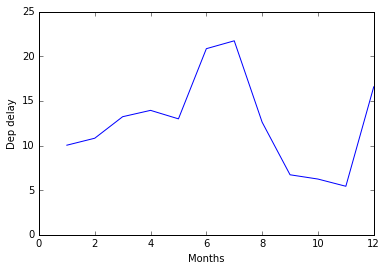

In [22]:
#plot departure delays w.r.t months
plt.ylabel("Dep delay")
plt.xlabel("Months")

#set y limit
plt.ylim(0,25)

#group by months
plt.plot(flights_df.groupby(['month'])['dep_delay'].mean())

We see that there is a dip in the holiday season of Summer(though it increases from June to July, it dips drastically from July to August) and Winter holiday season. 
One question that I can think of is "Do airlines try to keep the departure delay tight towards holiday season?"
It is interesting to observe that even in December the average delay increases very steeply. Maybe because the flights would be able to match the weather conditions.

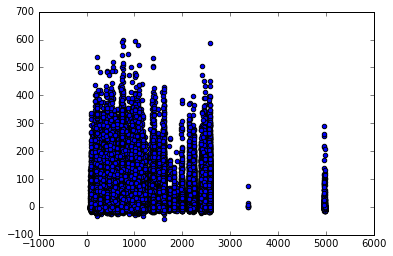

In [23]:
#scatter plot to examins departure delay against distance
#eliminated delays beyond 600 minutes
plt.scatter(flights_df.distance[flights_df.dep_delay<600],flights_df.dep_delay[flights_df.dep_delay<600])

We see a dip for departure delay in the range of 1700-2000 miles. This could be because of a specific destination.
We could frame a question based on departure delay as a function of distance to to destination.
Question - "Departure delays for flights flying to certain destinations (within 1700-2000 miles radius)are biased"

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

In [24]:
#summarize weather dataset
weather_df.describe()

C:\Miniconda3\lib\site-packages\numpy\lib\function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Unnamed: 0,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
count,8719.000000,8719.0,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8718.000000,8486.000000,8718.000000,8718.000000,8719.000000,7780.000000,8719.000000
mean,4360.000000,2013.0,6.506538,15.679628,11.515715,55.484942,41.794184,62.863333,193.194674,9.335732,10.743374,0.003035,1017.826465,9.224522
std,2517.102832,0.0,3.439961,8.768250,6.916846,18.345817,19.619776,19.572699,110.541333,12.328261,14.187117,0.022686,7.396722,2.094044
min,1.000000,2013.0,1.000000,1.000000,0.000000,10.940000,-9.040000,13.950000,0.000000,0.000000,0.000000,0.000000,983.900000,0.120000
25%,2180.500000,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,10.000000
50%,4360.000000,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,10.000000
75%,6539.500000,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,10.000000
max,8719.000000,2013.0,12.000000,31.000000,23.000000,100.040000,75.920000,100.000000,360.000000,1048.360580,1206.432388,1.180000,1041.900000,10.000000


In [25]:
#merge the two frames
f_w = flights_df[['month','day','hour','origin','dest','dep_delay']].merge(weather_df, on=['month','day','hour','origin'], how = 'left' )

In [26]:
#view the merge
f_w.describe()

C:\Miniconda3\lib\site-packages\numpy\lib\function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,month,day,hour,dep_delay,Unnamed: 0,year,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
count,336776.000000,336776.000000,328521.000000,328521.000000,117251.000000,117251.0,117242.000000,117242.000000,117242.000000,113527.000000,117241.000000,117241.000000,117251.000000,104183.000000,117251.000000
mean,6.548510,15.710787,13.173544,12.639070,4353.704293,2013.0,55.809277,41.840445,62.437195,191.313961,9.509912,10.943817,0.003034,1017.904410,9.231392
std,3.414457,8.768607,4.894426,40.210061,2489.000897,0.0,18.358136,19.506415,19.909390,113.452540,17.739069,20.413766,0.024754,7.440174,2.056207
min,1.000000,1.000000,0.000000,-43.000000,6.000000,2013.0,10.940000,-9.040000,13.950000,0.000000,0.000000,0.000000,0.000000,983.900000,0.120000
25%,4.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.000000,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,10.000000,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,12.000000,31.000000,24.000000,1301.000000,8719.000000,2013.0,100.040000,75.920000,100.000000,360.000000,1048.360580,1206.432388,1.180000,1041.900000,10.000000


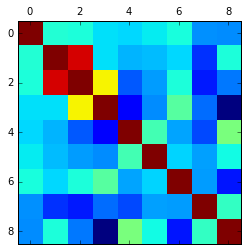

In [28]:
#correlation matrix
plt.matshow(f_w[['dep_delay','temp','dewp','humid','wind_dir','wind_gust','precip','pressure','visib']].corr())

There is no significant linear correlation between the selected variables 

In [29]:
#categorise wind direction
f_w.wind_dir = (f_w.wind_dir.dropna()).astype('category') 

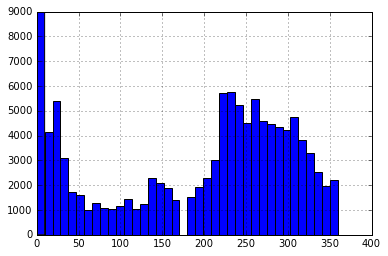

In [30]:
#view distribution
f_w.wind_dir.hist(bins = 38)

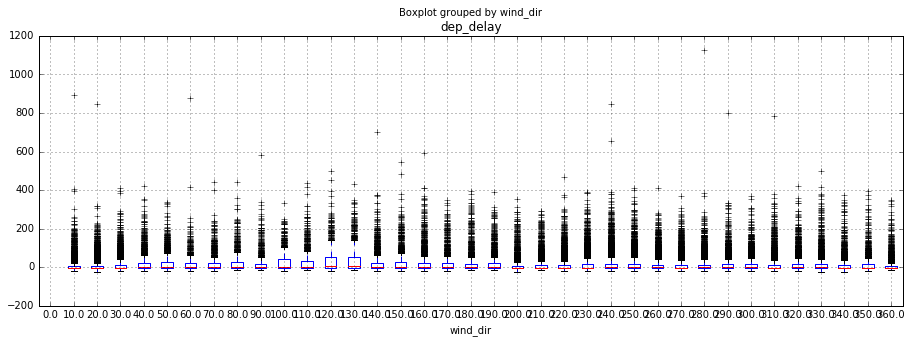

In [31]:
#check for any variation of departure delay with respect to wind direction
f_w[~(f_w.wind_dir == 0)].boxplot('dep_delay', by = 'wind_dir', figsize = (15,5))
#plt.plot(f_w[~(f_w.wind_dir == 0)].dep_delay,f_w[~(f_w.wind_dir == 0)].)

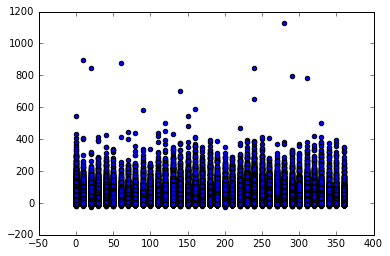

In [32]:
#scatter plot for patterns
plt.scatter(f_w.wind_dir,f_w.dep_delay)

In [39]:
#group by wind direction and months
de_sp =(f_w.groupby(['wind_dir','month'])['dep_delay','wind_speed'].mean())

In [50]:
#convert to dataframe
dde = pd.DataFrame(de_sp).reset_index()

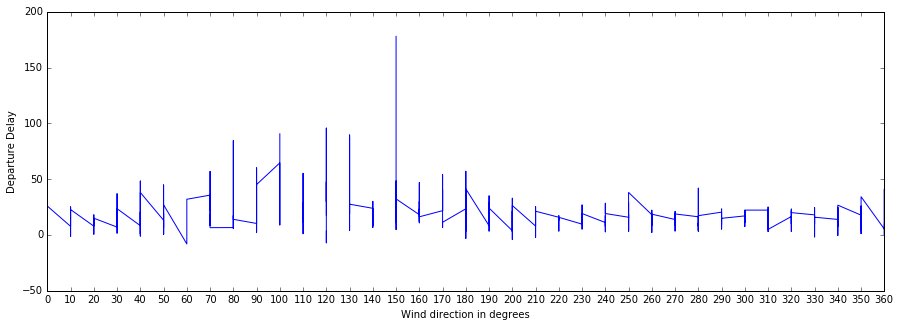

In [56]:
#plot the departure delays against wind directions
plt.figure(figsize=(15,5))
plt.xticks(range(0,370,10))
plt.xlabel('Wind direction in degrees')
plt.ylabel('Departure Delay')
plt.plot(dde.wind_dir,dde.dep_delay)

We obeserve that for the wind direction from 80 to 150 (East to South East)there is an upward trend in departure delay

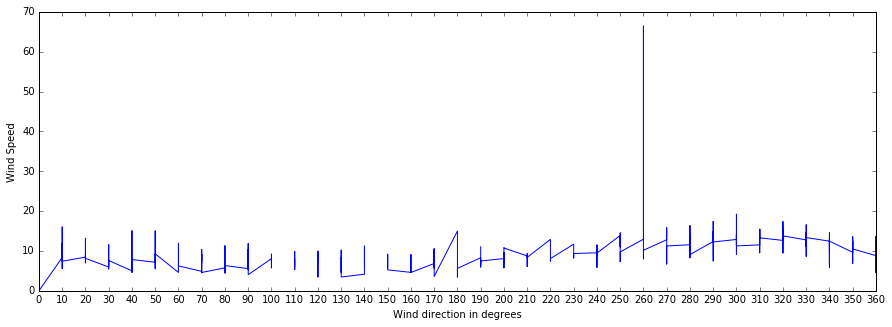

In [57]:
#do wind speed in the direction influence? Check with the plot
plt.figure(figsize=(15,5))
plt.xticks(range(0,370,10))
plt.xlabel('Wind direction in degrees')
plt.ylabel('Wind Speed')
plt.plot(dde.wind_dir,dde.wind_speed)

We observe that there isn't a similar pattern such that the wind speed in East to South East direction influenced the departure delays. 
So it would be interesting to see if the winds flowing in 80-150 degrees (East, South East) can hamper the departure and thus introduce delays.
Thus, we can label wind directions specially from (80 degrees to 150 degrees - East to South East) could have influenced the departure delays

In [75]:
a = {'a':3,'b':5,'c' :"b", 'd':True}
type(a)
15%6.0

3.0